<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_29_Forest_Cover_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Objective : Build a machine learning model to predict the forest cover type.

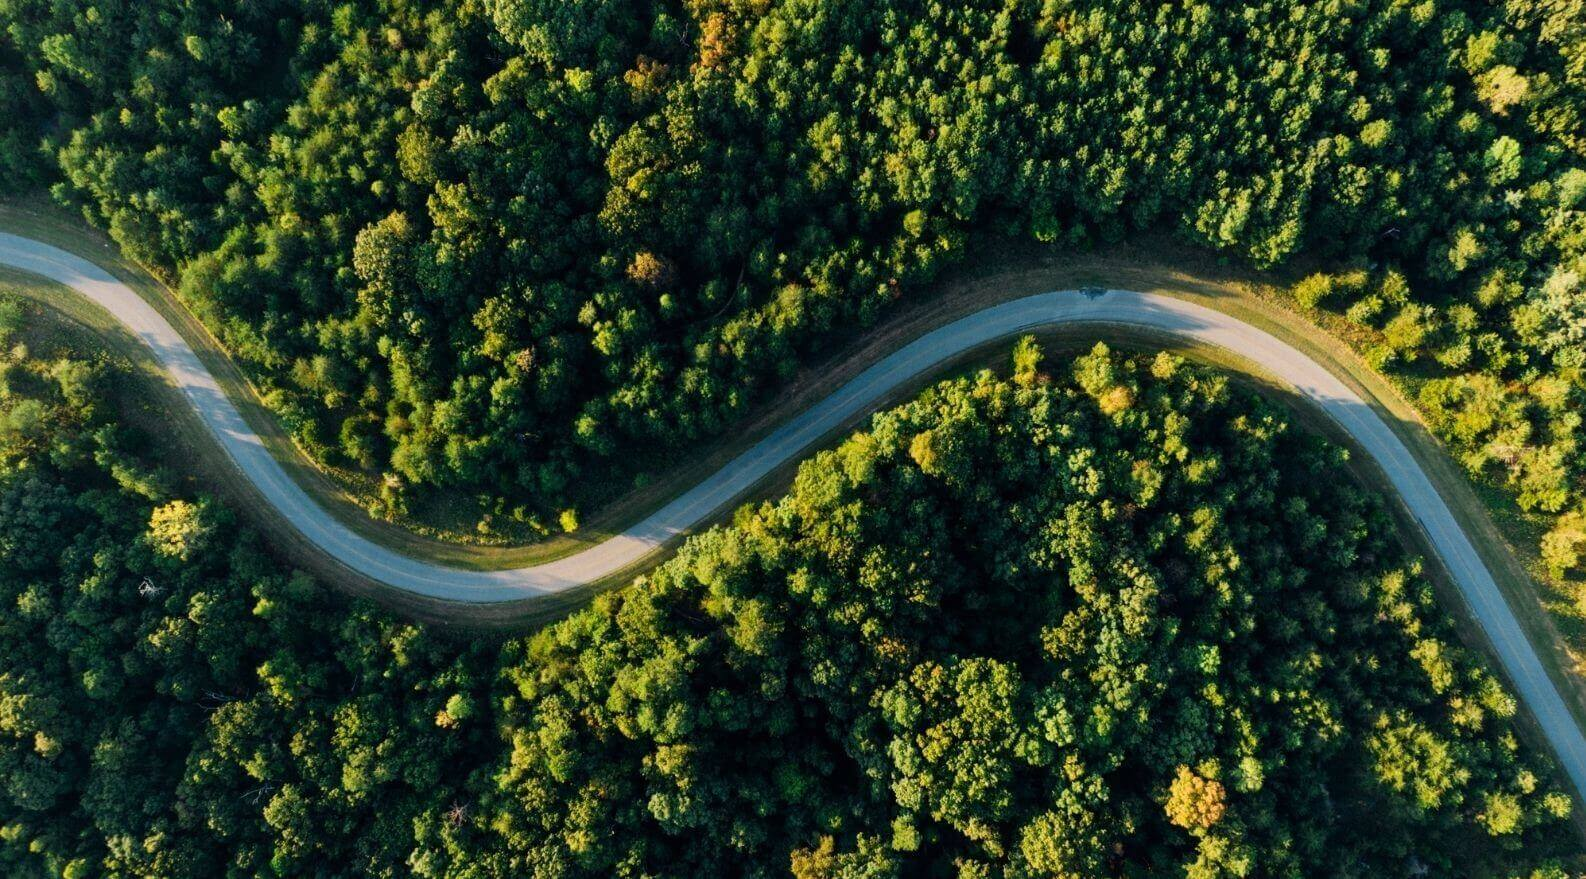

# Content

Forest cover in general refers to the relative (in percent) or sure (in square kilometres/square miles) land area that is covered by forests.
According to the Food and Agriculture Organization, a forest is defined as land spanning more than 0.5 hectares with trees higher than 5 meters and a canopy cover of more than 10 percent, or trees able to reach these thresholds in situ. It does not include land that is predominantly under agricultural or urban land use.

Forest cover is one category of terrestrial land cover. Land cover is the observed physical features, both natural and manmade, that occupy the earth’s immediate surface ... forest cover is defined as 25% or greater canopy closure at the Landsat pixel scale


## About the Data
The training dataset contains 250k observations with 54 cartographic variables excluding the target variable (i.e. Cover_Type).

 

Data Description

 

Name                                                        Description

 

Elevation                                                 Elevation in meters

Aspect                                                     Aspect in degrees azimuth

Slope                                                       Slope in degrees

Horizontal_Distance_To_Hydrology        Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology            Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways       Horz Dist to nearest roadway

Hillshade_9am                                        Hillshade index at 9am, summer solstice

Hillshade_Noon                                      Hillshade index at noon, summer soltice

Hillshade_3pm                                        Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points      Horz Dist to nearest wildfire ignition points

Wilderness_Area (4 binary columns)      Wilderness area designation

Soil_Type (40 binary columns)                Soil Type designation

Cover_Type (7 types)                              Forest Cover Type designation

## Loading Libraries

In [1]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipulation tool
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [ ]:
from google.colab import files
files.upload()

Saving Sample_Submission.csv to Sample_Submission.csv


{'Sample_Submission.csv': b'prediction\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r\n4\r

In [ ]:
shutil.move("/content/Sample_Submission.csv","/content/drive/MyDrive/Forest_Cover")

'/content/drive/MyDrive/Forest_Cover/Sample_Submission.csv'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading Dataset

In [4]:
# In read_csv() function, we have passed the location to where the files are located in the dphi official github page.
train_data = pd.read_csv("/content/drive/MyDrive/Forest_Cover/Train_data.csv")
train_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


## Basic EDA

In [ ]:
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

None

In [ ]:
display(train_data.describe())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2748.505160,156.212172,16.331052,228.094032,50.897820,1719.966576,212.370488,218.510700,134.502764,1521.756904,0.238300,0.033360,0.417824,0.308692,0.018344,0.035864,0.058376,0.046920,0.009036,0.037396,0.000060,0.000092,0.000612,0.126132,0.023604,0.015736,0.032068,0.006308,0.000004,0.004604,0.030532,0.003516,0.002868,0.007580,0.000628,0.022004,0.047560,0.015400,0.000232,0.003188,0.000844,0.000600,0.084728,0.046952,0.019988,0.041580,0.039880,0.001500,0.006464,0.000396,0.001852,0.046020,0.041388,0.026892,4.000320
std,418.300975,109.652847,8.317490,209.630153,61.006967,1330.817603,30.654582,22.680947,46.033892,1107.378373,0.426044,0.179575,0.493202,0.461955,0.134192,0.185951,0.234454,0.211468,0.094628,0.189731,0.007746,0.009591,0.024731,0.331999,0.151812,0.124453,0.176181,0.079172,0.002000,0.067697,0.172046,0.059192,0.053477,0.086733,0.025052,0.146697,0.212834,0.123138,0.015230,0.056372,0.029039,0.024488,0.278477,0.211536,0.139959,0.199628,0.195678,0.038701,0.080139,0.019896,0.042995,0.209529,0.199186,0.161768,2.001108
min,1859.000000,0.000000,0.000000,0.000000,-163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2375.000000,65.000000,10.000000,66.000000,5.000000,756.000000,195.000000,206.000000,106.000000,734.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2753.000000,125.000000,15.000000,180.000000,32.000000,1318.000000,220.000000,222.000000,137.000000,1273.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

## Visualize the Labels

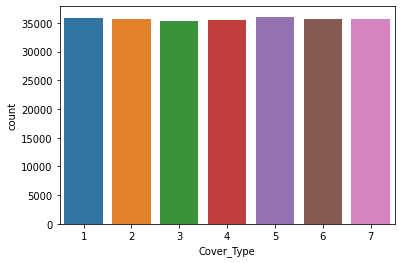

In [ ]:
sns.countplot(x='Cover_Type',data=train_data)

#### Data is balanced

## Check if Data is missing

In [ ]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

## Check for Anomalies & Outliers
* Lower Range :x < Q1 - 3 * IQR
* Upper Range :x > Q3 + 3 * IQR

In [5]:
def outlier_function(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count


In [ ]:
# loop through all columns to see if there are any outliers
outlier_cols = {}
for column in train_data.columns:
    if outlier_function(train_data, column)[2] > 0:
        fract_outlier = (outlier_function(train_data, column)[2]/train_data.shape[0]) * 100.0
        outlier_cols[column] = fract_outlier
        print("There are {} % outliers in {}".format((outlier_function(train_data, column)[2]/train_data.shape[0]) * 100.0, column))

There are 0.0012000000000000001 % outliers in Slope
There are 0.2928 % outliers in Horizontal_Distance_To_Hydrology
There are 0.3828 % outliers in Vertical_Distance_To_Hydrology
There are 0.0068 % outliers in Horizontal_Distance_To_Roadways
There are 0.0312 % outliers in Hillshade_9am
There are 0.0776 % outliers in Hillshade_Noon
There are 0.9575999999999999 % outliers in Horizontal_Distance_To_Fire_Points
There are 23.830000000000002 % outliers in Wilderness_Area_1
There are 3.3360000000000003 % outliers in Wilderness_Area_2
There are 1.8344 % outliers in Soil_Type_1
There are 3.5864 % outliers in Soil_Type_2
There are 5.8376 % outliers in Soil_Type_3
There are 4.692 % outliers in Soil_Type_4
There are 0.9036000000000001 % outliers in Soil_Type_5
There are 3.7396 % outliers in Soil_Type_6
There are 0.006 % outliers in Soil_Type_7
There are 0.0092 % outliers in Soil_Type_8
There are 0.061200000000000004 % outliers in Soil_Type_9
There are 12.613199999999999 % outliers in Soil_Type_10
T

In [ ]:
outlier_cols

{'Hillshade_9am': 0.0312,
 'Hillshade_Noon': 0.0776,
 'Horizontal_Distance_To_Fire_Points': 0.9575999999999999,
 'Horizontal_Distance_To_Hydrology': 0.2928,
 'Horizontal_Distance_To_Roadways': 0.0068,
 'Slope': 0.0012000000000000001,
 'Soil_Type_1': 1.8344,
 'Soil_Type_10': 12.613199999999999,
 'Soil_Type_11': 2.3604,
 'Soil_Type_12': 1.5735999999999999,
 'Soil_Type_13': 3.2068,
 'Soil_Type_14': 0.6308,
 'Soil_Type_15': 0.00039999999999999996,
 'Soil_Type_16': 0.4604,
 'Soil_Type_17': 3.0532,
 'Soil_Type_18': 0.3516,
 'Soil_Type_19': 0.2868,
 'Soil_Type_2': 3.5864,
 'Soil_Type_20': 0.758,
 'Soil_Type_21': 0.0628,
 'Soil_Type_22': 2.2004,
 'Soil_Type_23': 4.756,
 'Soil_Type_24': 1.54,
 'Soil_Type_25': 0.0232,
 'Soil_Type_26': 0.3188,
 'Soil_Type_27': 0.0844,
 'Soil_Type_28': 0.06,
 'Soil_Type_29': 8.4728,
 'Soil_Type_3': 5.8376,
 'Soil_Type_30': 4.6952,
 'Soil_Type_31': 1.9988,
 'Soil_Type_32': 4.1579999999999995,
 'Soil_Type_33': 3.988,
 'Soil_Type_34': 0.15,
 'Soil_Type_35': 0.6464,
 

In [ ]:
outlier_df = pd.DataFrame(list(outlier_cols.items()),columns=['cols','outlier_fraction'])
outlier_df.head()

,cols,outlier_fraction
0,Slope,0.0012
1,Horizontal_Distance_To_Hydrology,0.2928
2,Vertical_Distance_To_Hydrology,0.3828
3,Horizontal_Distance_To_Roadways,0.0068
4,Hillshade_9am,0.0312


In [ ]:
outlier_df = outlier_df.sort_values(by='outlier_fraction',ascending=False)
outlier_df.head()

,cols,outlier_fraction
7,Wilderness_Area_1,23.8300
18,Soil_Type_10,12.6132
37,Soil_Type_29,8.4728
11,Soil_Type_3,5.8376
31,Soil_Type_23,4.7560


In [ ]:
outlier_df

,cols,outlier_fraction
7,Wilderness_Area_1,23.8300
18,Soil_Type_10,12.6132
37,Soil_Type_29,8.4728
11,Soil_Type_3,5.8376
31,Soil_Type_23,4.7560
38,Soil_Type_30,4.6952
12,Soil_Type_4,4.6920
46,Soil_Type_38,4.6020
40,Soil_Type_32,4.1580
47,Soil_Type_39,4.1388


In [ ]:
keys = outlier_df['cols'].values.tolist()
for item in keys:
  print(f"column name : {item} - min value :{train_data[item].min()}- max value : {train_data[item].max()}")

column name : Wilderness_Area_1 - min value :0- max value : 1
column name : Soil_Type_10 - min value :0- max value : 1
column name : Soil_Type_29 - min value :0- max value : 1
column name : Soil_Type_3 - min value :0- max value : 1
column name : Soil_Type_23 - min value :0- max value : 1
column name : Soil_Type_30 - min value :0- max value : 1
column name : Soil_Type_4 - min value :0- max value : 1
column name : Soil_Type_38 - min value :0- max value : 1
column name : Soil_Type_32 - min value :0- max value : 1
column name : Soil_Type_39 - min value :0- max value : 1
column name : Soil_Type_33 - min value :0- max value : 1
column name : Soil_Type_6 - min value :0- max value : 1
column name : Soil_Type_2 - min value :0- max value : 1
column name : Wilderness_Area_2 - min value :0- max value : 1
column name : Soil_Type_13 - min value :0- max value : 1
column name : Soil_Type_17 - min value :0- max value : 1
column name : Soil_Type_40 - min value :0- max value : 1
column name : Soil_Type_1

#### The data ranges of those 4 columns:

* Vertical_Distance_To_Hydrology - min value :-163- max value : 598
* Horizontal_Distance_To_Hydrology - min value :0- max value : 1390
* Horizontal_Distance_To_Roadways - min value :0- max value : 7112
* Horizontal_Distance_To_Fire_Points - min value :0- max value : 7150

Considering the Horizaontal_Distance_To_Firepoints having the highest number of outliers and widest data range, we are going to remove outliers only from that column.

In [6]:
train_data.shape

(250000, 55)

## Remove Outliers

In [7]:
train_data = train_data[(train_data['Horizontal_Distance_To_Fire_Points'] > outlier_function(train_data, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train_data['Horizontal_Distance_To_Fire_Points'] < outlier_function(train_data, 'Horizontal_Distance_To_Fire_Points')[1])]
train_data.shape

(247605, 55)

In [8]:
train_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


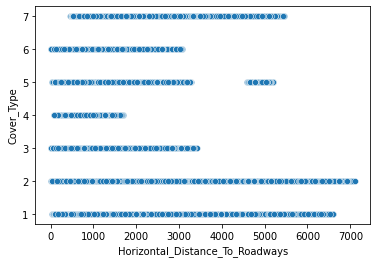

In [ ]:
sns.scatterplot(x='Horizontal_Distance_To_Roadways',y='Cover_Type',data=train_data)

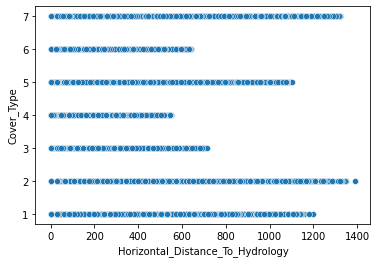

In [ ]:
sns.scatterplot(x='Horizontal_Distance_To_Hydrology',y='Cover_Type',data=train_data)

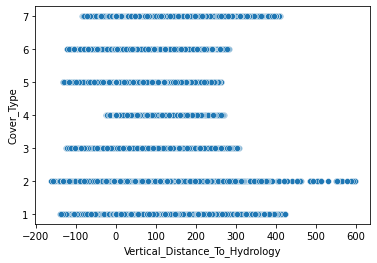

In [ ]:
sns.scatterplot(x='Vertical_Distance_To_Hydrology',y='Cover_Type',data=train_data)

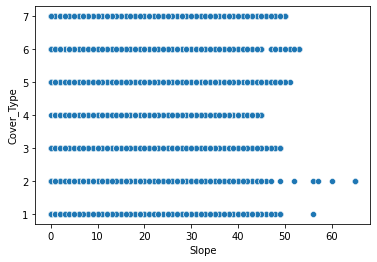

In [ ]:
sns.scatterplot(x='Slope',y='Cover_Type',data=train_data)

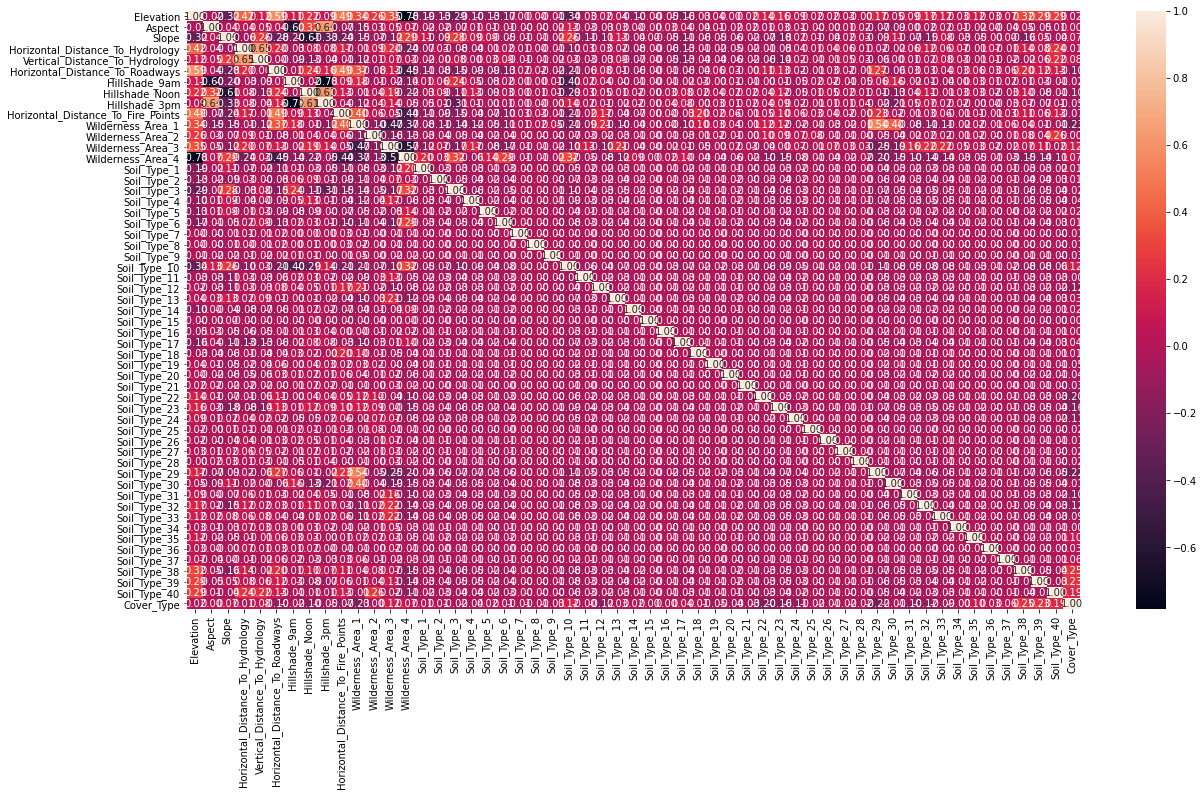

In [ ]:
corr = train_data.corr()
plt.figure(figsize=(20,11))
sns.heatmap(corr,annot=True,fmt=".2f")

* Soil Type 7 and 15 columns are blank in the heatmap, thus zero effect on determining the label Cover_Type.

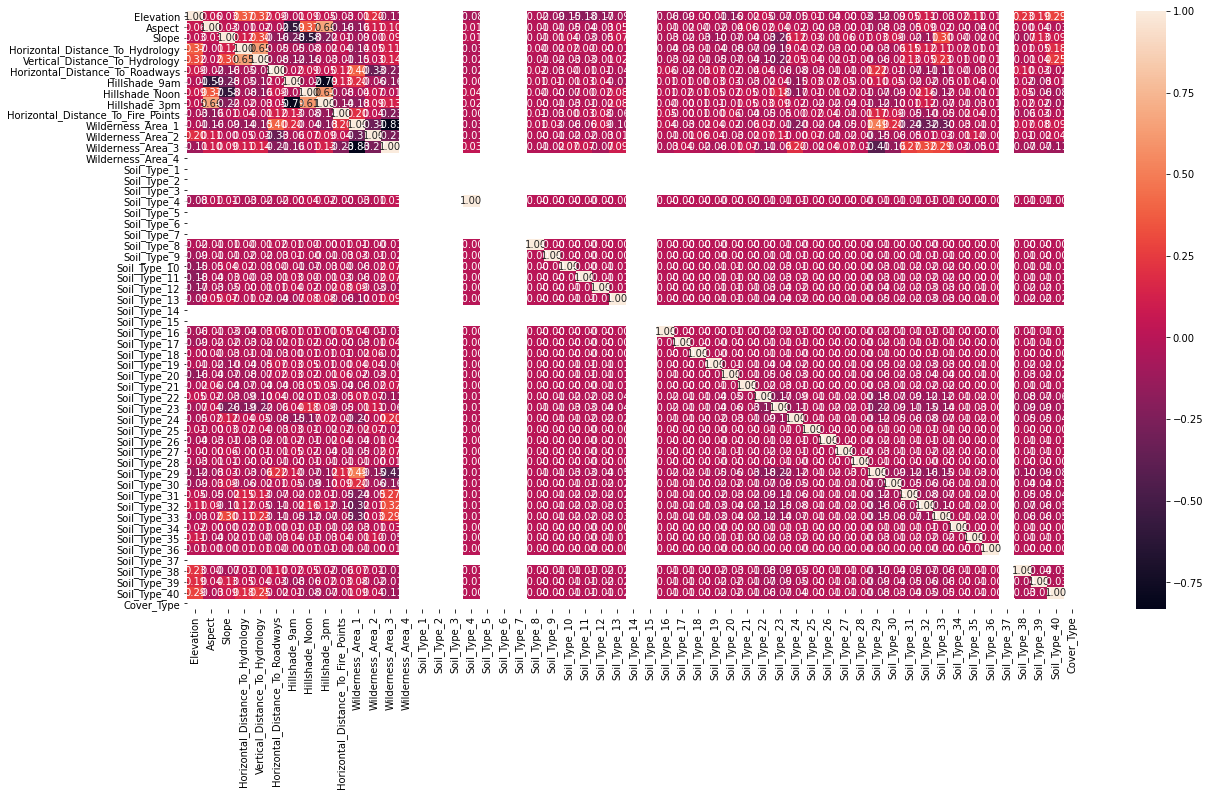

In [ ]:
corr = train_data[train_data['Cover_Type'] ==1].corr()
plt.figure(figsize=(20,11))
sns.heatmap(corr,annot=True,fmt=".2f")

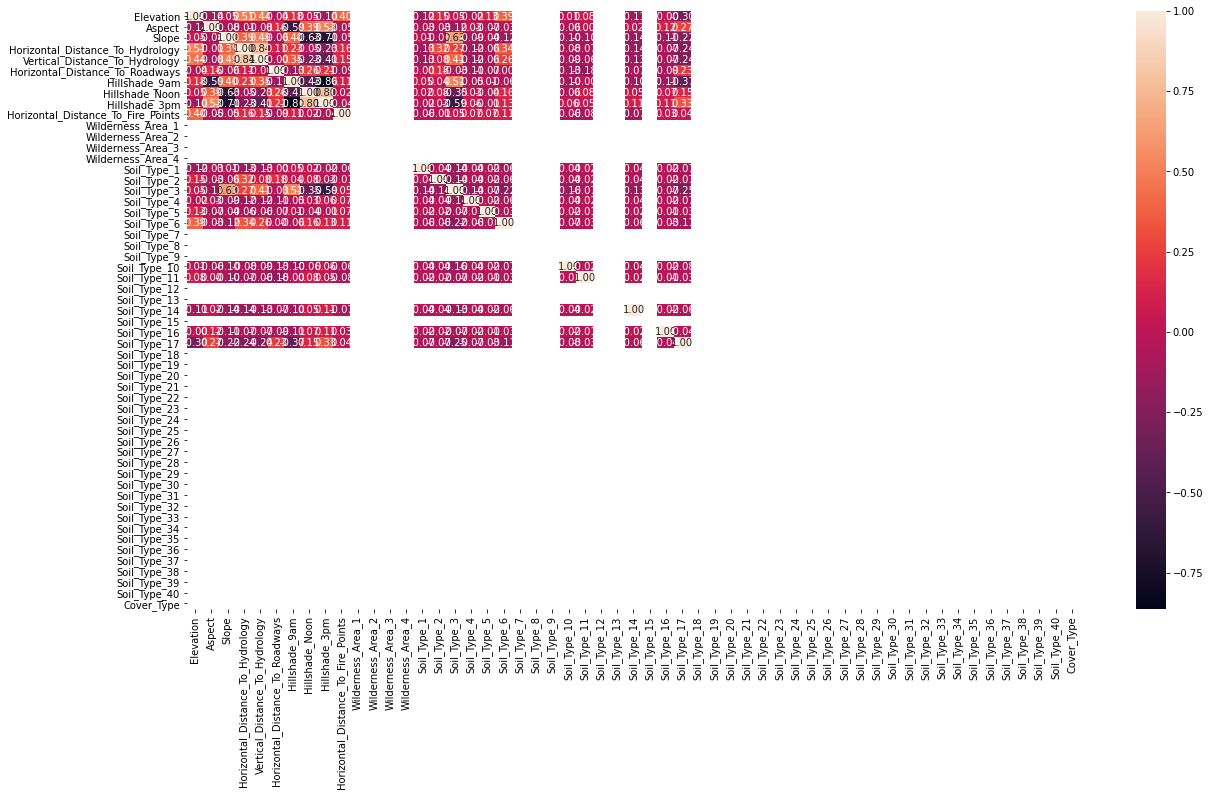

In [ ]:
corr = train_data[train_data['Cover_Type'] ==4].corr()
plt.figure(figsize=(20,11))
sns.heatmap(corr,annot=True,fmt=".2f")

* Cover Type 4 does not grow in wilderness

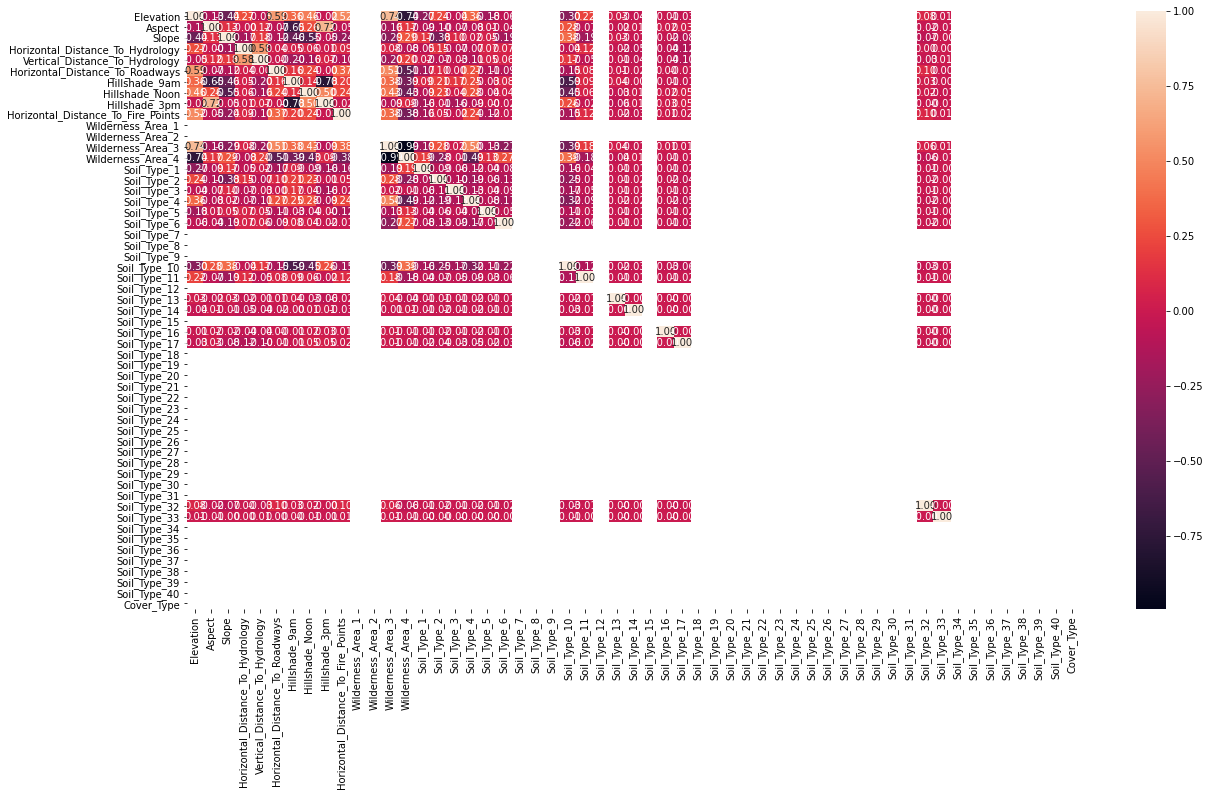

In [ ]:
corr = train_data[train_data['Cover_Type'] ==3].corr()
plt.figure(figsize=(20,11))
sns.heatmap(corr,annot=True,fmt=".2f")

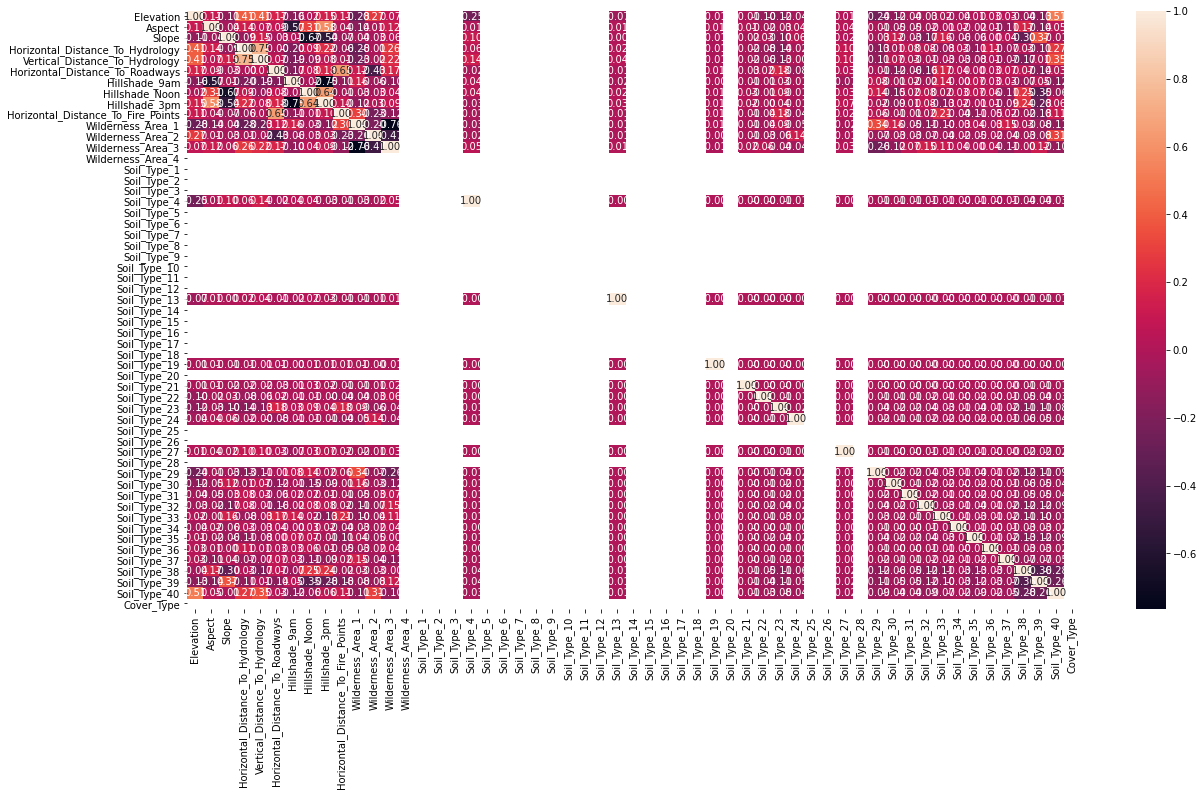

In [ ]:
corr = train_data[train_data['Cover_Type'] ==7].corr()
plt.figure(figsize=(20,11))
sns.heatmap(corr,annot=True,fmt=".2f")

In [9]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.split('_')[-1]
    return int(head)



In [10]:
split_numbers_chars("Wilderness_Area_3")

3

In [11]:
wilderness_features = ['Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3','Wilderness_Area_4']
df = train_data[wilderness_features]
df.head() 

,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [12]:
df.shape

(247605, 4)

In [13]:
df['Wilderness'] = df.idxmax(1)

In [14]:
df.head()

,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Wilderness
0,0,0,1,0,Wilderness_Area_3
1,1,0,0,0,Wilderness_Area_1
2,1,0,0,0,Wilderness_Area_1
3,0,0,1,0,Wilderness_Area_3
4,0,0,1,0,Wilderness_Area_3


In [15]:
df['Wilderness'] = df['Wilderness'].map(split_numbers_chars)

In [16]:
df.head()

,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Wilderness
0,0,0,1,0,3
1,1,0,0,0,1
2,1,0,0,0,1
3,0,0,1,0,3
4,0,0,1,0,3


In [17]:
wilderness = df['Wilderness'].values.tolist()

In [18]:
soil = ["Soil_Type_"+str(i) for i in range(1,41)]
df_soil = train_data[soil]
df_soil.head()

,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [19]:
df['Soil'] = df_soil.idxmax(1)

In [20]:
df.head()

,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Wilderness,Soil
0,0,0,1,0,3,Soil_Type_10
1,1,0,0,0,1,Soil_Type_38
2,1,0,0,0,1,Soil_Type_38
3,0,0,1,0,3,Soil_Type_13
4,0,0,1,0,3,Soil_Type_31


In [21]:
df['Soil'] = df['Soil'].map(split_numbers_chars)

In [22]:
df.head()

,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Wilderness,Soil
0,0,0,1,0,3,10
1,1,0,0,0,1,38
2,1,0,0,0,1,38
3,0,0,1,0,3,13
4,0,0,1,0,3,31


In [23]:
Soil = df['Soil'].values.tolist()

In [24]:
train = train_data.copy()

In [25]:
train['Soil'] = Soil
train['Wilderness'] = wilderness
train.drop(wilderness_features,axis=1,inplace=True)
train.drop(soil,axis=1,inplace=True)
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil,Wilderness
0,2696,123,10,212,48,2245,237,231,123,2113,6,10,3
1,3269,110,19,134,40,3734,249,216,88,3960,1,38,1
2,3283,322,18,346,104,4369,170,217,185,1330,7,38,1
3,2847,89,31,270,175,1320,248,173,29,889,5,13,3
4,3248,93,12,507,118,570,239,221,110,945,7,31,3


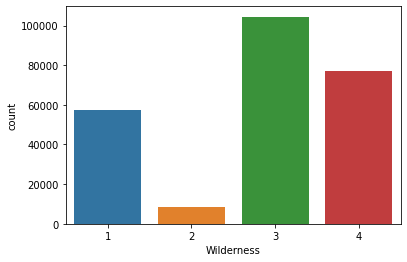

In [ ]:
sns.countplot(x='Wilderness',data=train)

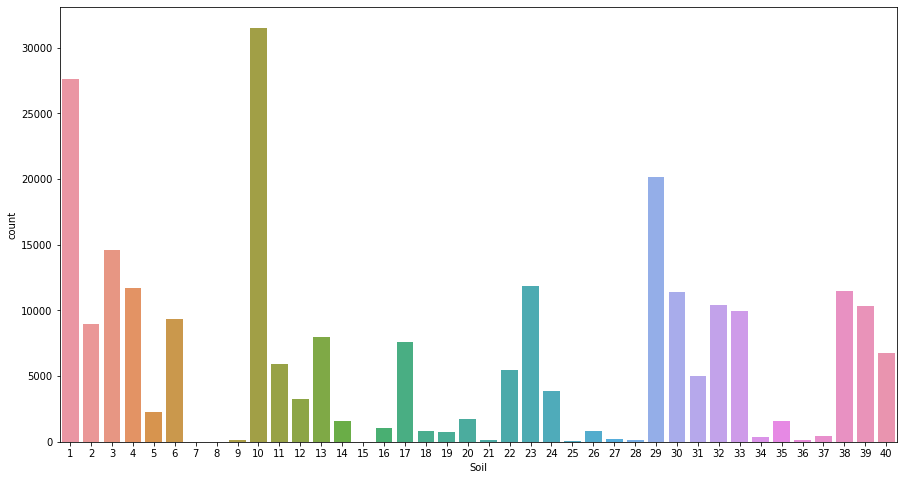

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Soil',data=train)

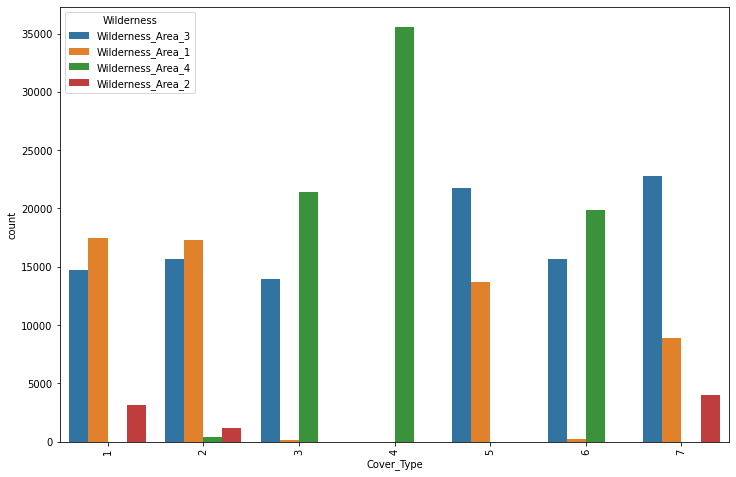

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(x= 'Cover_Type',data=train,hue='Wilderness')
plt.show()

* Cover_Type 4 only grows in wilderness 2

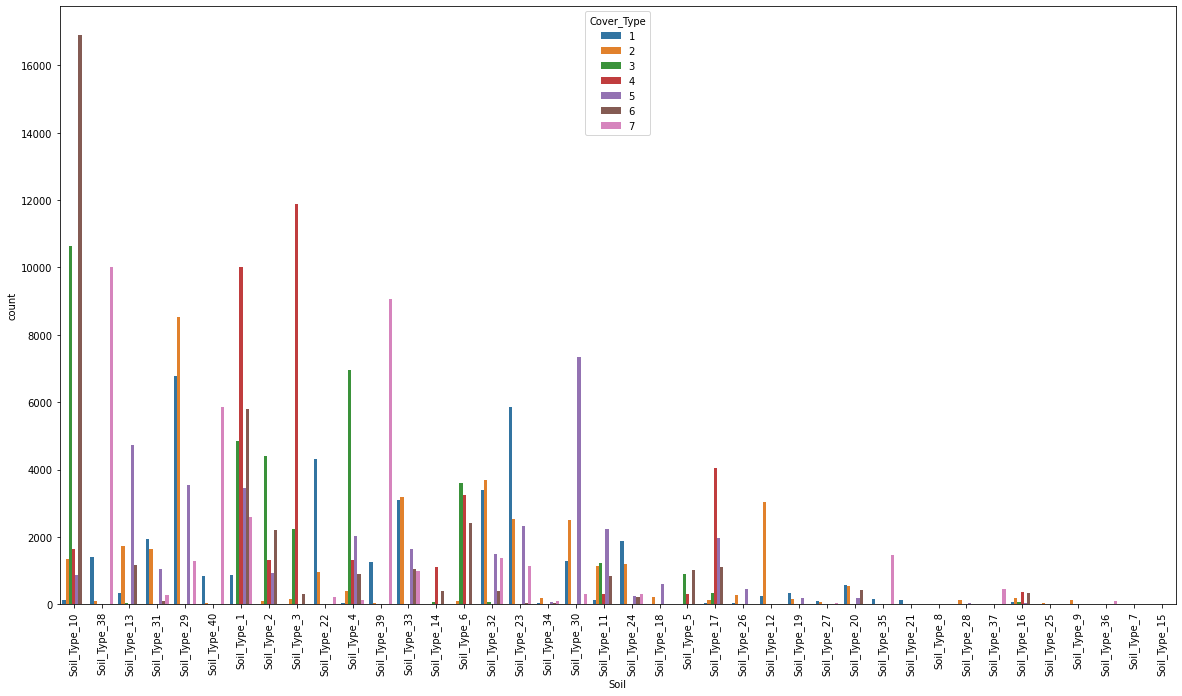

In [ ]:
plt.figure(figsize=(20,11))
plt.xticks(rotation=90)
sns.countplot(x= 'Soil',data=train,hue='Cover_Type')
plt.show()

## New Features

In [26]:
train['Euclidian_Distance_To_Hydrology'] = (train['Horizontal_Distance_To_Hydrology']**2 + 
                                                           train['Vertical_Distance_To_Hydrology']**2)**0.5
train['Mean_Elevation_Vertical_Distance_Hydrology'] = (train['Elevation'] + 
                                                                      train['Vertical_Distance_To_Hydrology'])/2
train_data['Mean_Distance_Hydrology_Firepoints'] = (train['Horizontal_Distance_To_Hydrology'] + 
                                                              train['Horizontal_Distance_To_Fire_Points'])/2
train['Mean_Distance_Hydrology_Roadways'] = (train['Horizontal_Distance_To_Hydrology'] + 
                                                            train['Horizontal_Distance_To_Roadways'])/2
train['Mean_Distance_Firepoints_Roadways'] = (train['Horizontal_Distance_To_Fire_Points'] + 
                                                             train['Horizontal_Distance_To_Roadways'])/2

In [ ]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil,Wilderness,Euclidian_Distance_To_Hydrology,Mean_Elevation_Vertical_Distance_Hydrology,Mean_Distance_Hydrology_Roadways,Mean_Distance_Firepoints_Roadways
0,2696,123,10,212,48,2245,237,231,123,2113,6,10,3,217.366051,1372.0,1228.5,2179.0
1,3269,110,19,134,40,3734,249,216,88,3960,1,38,1,139.842769,1654.5,1934.0,3847.0
2,3283,322,18,346,104,4369,170,217,185,1330,7,38,1,361.292126,1693.5,2357.5,2849.5
3,2847,89,31,270,175,1320,248,173,29,889,5,13,3,321.753011,1511.0,795.0,1104.5
4,3248,93,12,507,118,570,239,221,110,945,7,31,3,520.550670,1683.0,538.5,757.5


In [27]:
train =train[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Soil',
       'Wilderness', 'Euclidian_Distance_To_Hydrology',
       'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Hydrology_Roadways',
       'Mean_Distance_Firepoints_Roadways','Cover_Type']]

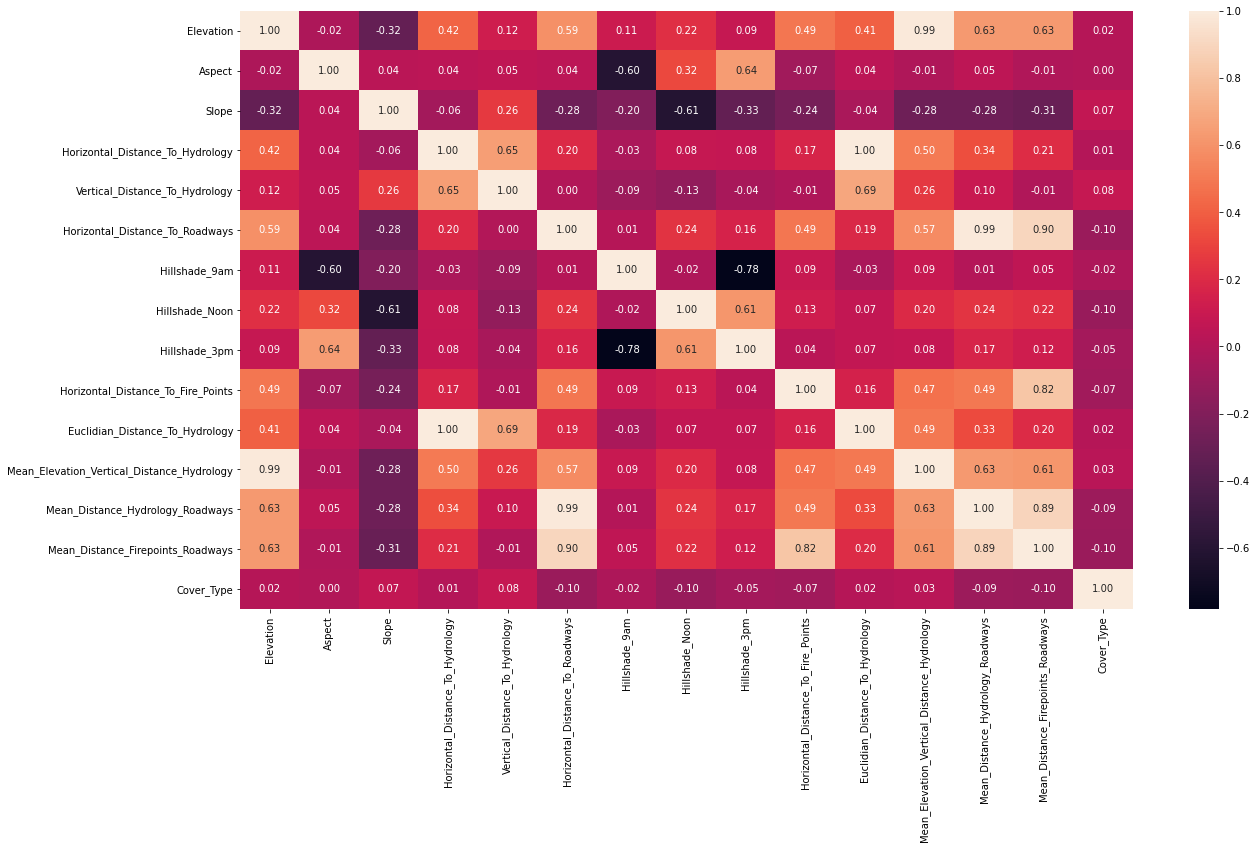

In [ ]:
plt.figure(figsize=(20,11))
sns.heatmap(train.corr(),annot=True,fmt=".2f")

In [ ]:
train.to_csv("Processed_data.csv",index=False)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Forest_Cover/Processed_data.csv")

In [28]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil,Wilderness,Euclidian_Distance_To_Hydrology,Mean_Elevation_Vertical_Distance_Hydrology,Mean_Distance_Hydrology_Roadways,Mean_Distance_Firepoints_Roadways,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,10,3,217.366051,1372.0,1228.5,2179.0,6
1,3269,110,19,134,40,3734,249,216,88,3960,38,1,139.842769,1654.5,1934.0,3847.0,1
2,3283,322,18,346,104,4369,170,217,185,1330,38,1,361.292126,1693.5,2357.5,2849.5,7
3,2847,89,31,270,175,1320,248,173,29,889,13,3,321.753011,1511.0,795.0,1104.5,5
4,3248,93,12,507,118,570,239,221,110,945,31,3,520.550670,1683.0,538.5,757.5,7


In [29]:
!pip install catboost

     |████████████████████████████████| 67.3MB 157kB/s 


In [30]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *

In [31]:
cat_cols = [col for col in train.columns if train[col].dtypes == 'O']
X = train.drop('Cover_Type',axis=1)
Y = train['Cover_Type']

In [36]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'max_depth': [4,6,8,10],
    'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
    'iterations':[250,100,500,1000],
    'l2_leaf_reg':[3,1,5,10,100]
    }
catboost = CatBoostClassifier(random_state=42,verbose=0,task_type="GPU")
grid = GridSearchCV(catboost, 
                    gridParams, 
                    verbose=2, 
                    cv=5,
                    scoring='f1_weighted',
                    n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 65.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 82.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 141.8min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 282.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 445.1min finished


{'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.3, 'max_depth': 10}
0.9699556275141743


In [37]:
grid.best_estimator_

## Stratified Kfold

Running 1 iteration
0.9615356655331454
0.961107251902231
Running 2 iteration
0.9611641074933563
0.9609457036235279
Running 3 iteration
0.9609217870326244
0.9613980388038965
Running 4 iteration
0.9619153009216255
0.9617695998449136
Running 5 iteration
0.9609056323352423
0.9624077155457909
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.9609056323352423 0.9624077155457909 0.9614070803036354


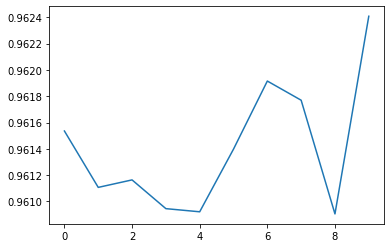

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp.iloc[train_index],temp.iloc[test_index]
        ytrain,ytest = target.iloc[train_index],target.iloc[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = CatBoostClassifier(max_depth=10,
                                   random_state=42,
                                   iterations = 1000,
                                   learning_rate =0.3,
                                   l2_leaf_reg = 1,
                                   eval_metric='Accuracy',
                                   auto_class_weights='Balanced',
                                   verbose=0,task_type="GPU")
        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(accuracy_score(ytest,preds))
        scores.append(accuracy_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

## Extra Tree Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [50, 100, 300, 500, 1000]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['auto', 'sqrt', 'log2', None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [ ]:
# create model
best_model = ExtraTreesClassifier(random_state=42)

# create Randomized search object
random_cv = RandomizedSearchCV(estimator=best_model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

In [ ]:
cat_cols

['Soil', 'Wilderness']

In [ ]:
X = train.drop('Cover_Type',axis=1)
Y = train['Cover_Type']
random_cv.fit(X, Y)

# Print the best parameters found
print(random_cv.best_params_)
print(random_cv.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
train.isnull().sum()

Elevation                                     0
Aspect                                        0
Slope                                         0
Horizontal_Distance_To_Hydrology              0
Vertical_Distance_To_Hydrology                0
Horizontal_Distance_To_Roadways               0
Hillshade_9am                                 0
Hillshade_Noon                                0
Hillshade_3pm                                 0
Horizontal_Distance_To_Fire_Points            0
Soil                                          0
Wilderness                                    0
Euclidian_Distance_To_Hydrology               0
Mean_Elevation_Vertical_Distance_Hydrology    0
Mean_Distance_Hydrology_Roadways              0
Mean_Distance_Firepoints_Roadways             0
Cover_Type                                    0
dtype: int64

In [ ]:
X = train.drop('Cover_Type',axis=1)
Y = train['Cover_Type']

In [ ]:
X.shape

(247605, 16)

In [ ]:
Y.shape

(247605,)

In [ ]:
et = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features=None, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

Running 1 iteration
0.9707034562975049
0.9703639682719181
Running 2 iteration
0.9699926496126912
0.9701781877514095
Running 3 iteration
0.9703076662116427
0.9700327943005768
Running 4 iteration
0.9692576108818042
0.9702993489604368
Running 5 iteration
0.97059037341583
0.9708809227637679
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.9692576108818042 0.9708809227637679 0.9702606978467582


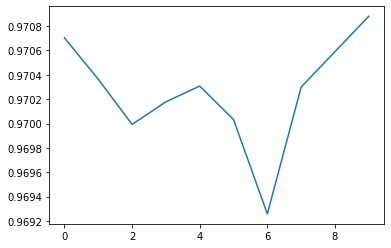

In [ ]:
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp.iloc[train_index],temp.iloc[test_index]
        ytrain,ytest = target.iloc[train_index],target.iloc[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = et
        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(accuracy_score(ytest,preds))
        scores.append(accuracy_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

## Load Test Data

In [41]:
test_data = pd.read_csv('/content/drive/MyDrive/Forest_Cover/Test_data.csv')

In [42]:
test_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2157,345,11,0,0,1103,198,222,161,823,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2740,40,23,94,-13,150,214,179,88,1307,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2404,46,11,558,110,625,223,215,124,1051,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3002,201,23,256,35,4582,204,253,173,1708,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2360,306,6,136,57,1054,202,236,173,862,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
soil = ["Soil_Type_"+str(i) for i in range(1,41)]

In [44]:
df_soil_test = test_data[soil]
df_soil_test['Soil']= df_soil_test.idxmax(1)
df_soil_test['Soil'] = df_soil_test['Soil'].map(split_numbers_chars)   
Soil = df_soil_test['Soil'].values.tolist()

In [45]:
wilderness_features = ['Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3','Wilderness_Area_4']
df = test_data[wilderness_features]
df['Wilderness']= df.idxmax(1)
df['Wilderness'] = df['Wilderness'].map(split_numbers_chars)   
Wilderness = df['Wilderness'].values.tolist()

In [46]:
test_data['Soil'] = Soil
test_data['Wilderness'] = Wilderness

In [47]:
test_data['Euclidian_Distance_To_Hydrology'] = (test_data['Horizontal_Distance_To_Hydrology']**2 + 
                                                           test_data['Vertical_Distance_To_Hydrology']**2)**0.5
test_data['Mean_Elevation_Vertical_Distance_Hydrology'] = (test_data['Elevation'] + 
                                                                      test_data['Vertical_Distance_To_Hydrology'])/2
test_data['Mean_Distance_Hydrology_Firepoints'] = (test_data['Horizontal_Distance_To_Hydrology'] + 
                                                              test_data['Horizontal_Distance_To_Fire_Points'])/2
test_data['Mean_Distance_Hydrology_Roadways'] = (test_data['Horizontal_Distance_To_Hydrology'] + 
                                                            test_data['Horizontal_Distance_To_Roadways'])/2
test_data['Mean_Distance_Firepoints_Roadways'] = (test_data['Horizontal_Distance_To_Fire_Points'] + 
                                                             test_data['Horizontal_Distance_To_Roadways'])/2

In [48]:
test_data = test_data[X.columns]

In [49]:
test_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil,Wilderness,Euclidian_Distance_To_Hydrology,Mean_Elevation_Vertical_Distance_Hydrology,Mean_Distance_Hydrology_Roadways,Mean_Distance_Firepoints_Roadways
0,2157,345,11,0,0,1103,198,222,161,823,17,4,0.000000,1078.5,551.5,963.0
1,2740,40,23,94,-13,150,214,179,88,1307,1,1,94.894678,1363.5,122.0,728.5
2,2404,46,11,558,110,625,223,215,124,1051,3,4,568.738956,1257.0,591.5,838.0
3,3002,201,23,256,35,4582,204,253,173,1708,29,1,258.381501,1518.5,2419.0,3145.0
4,2360,306,6,136,57,1054,202,236,173,862,10,4,147.461859,1208.5,595.0,958.0


In [50]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

In [53]:
predictions = model.predict(test_data)

In [55]:
preds =[p[0] for p in predictions]


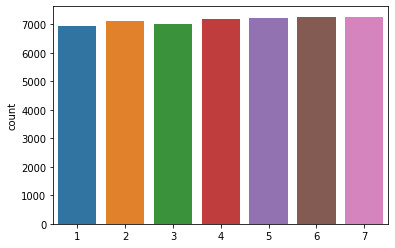

In [56]:
sns.countplot(preds)

In [58]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(preds) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submissioncat.csv', index = False)
files.download('submissioncat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Your score is 96.636 - ExtraTreeClassifier**

**Your score is 95.92399999999999.- CatBoostClassifier**

## Lightgbm Classifier

In [ ]:
lgbm = LGBMClassifier(random_state=42,objective='multiclass',gpu_use_dp=True)
params = {'max_depth': [3,7,10,12],
          'n_estimators':[200,500,700],
          'metric':['auc','multi_logloss']}
#
grid = GridSearchCV(estimator=lgbm,
                    param_grid=params,
                    scoring = 'f1_weighted',
                    verbose=10,
                    cv=5,
                    n_jobs=-1)

In [ ]:
grid.fit(X,Y)
# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.0min
